# 언더 샘플링

In [51]:
import pandas as pd

data = pd.read_csv('../dataset/master_4.csv')

In [52]:
from imblearn.under_sampling import *

In [53]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [54]:
X = data[data.columns.difference(['outcome_critical'])]
y = data['outcome_critical']

## 순서
### 샘플링 - train_test_split - modeling

In [5]:
## Sampling 하고 train, test 나누기

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022) # 80% training and 20% test

In [19]:
rand_clf = RandomForestClassifier(criterion='entropy', bootstrap=True, random_state=2022)

rand_clf.fit(X_train, y_train)
y_pred = rand_clf.predict(X_test)

## Random_Under_sampler
### 무작위로 데이터를 없애는 단순 샘플링

In [17]:
X_samp, y_samp = RandomUnderSampler(random_state=0).fit_resample(X, y)
# plot은 나중에

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.96      1.00      0.98     83899
        True       0.87      0.40      0.55      5896

    accuracy                           0.96     89795
   macro avg       0.91      0.70      0.76     89795
weighted avg       0.95      0.96      0.95     89795



## Tomek’s link method
### 토멕링크(Tomek’s link)란 서로 다른 클래스에 속하는 한 쌍의 데이터 (𝑥+,𝑥−)로 서로에게 더 가까운 다른 데이터가 존재하지 않는 것이다. 즉 클래스가 다른 두 데이터가 아주 가까이 붙어있으면 토멕링크가 된다. 토멕링크 방법은 이러한 토멕링크를 찾은 다음 그 중에서 다수 클래스에 속하는 데이터를 제외하는 방법으로 경계선을 다수 클래스쪽으로 밀어붙이는 효과가 있다.

In [6]:
X_samp, y_samp = TomekLinks().fit_resample(X, y)

TypeError: __init__() got an unexpected keyword argument 'random_state'

In [ ]:
print(classification_report(y_test, y_pred))

## Condensed Nearest Neighbour (CNN)
### CNN(Condensed Nearest Neighbour) 방법은 1-NN 모형으로 분류되지 않는 데이터만 남기는 방법

In [28]:
X_samp, y_samp = CondensedNearestNeighbour(random_state=0).fit_resample(X, y)

In [ ]:
print(classification_report(y_test, y_pred))

## One Sided Selection
### One Sided Selection은 토맥링크 방법과 Condensed Nearest Neighbour 방법을 섞은 것이다. 토맥링크 중 다수 클래스를 제외하고 나머지 데이터 중에서도 서로 붙어있는 다수 클래스 데이터는 1-NN 방법으로 제외한다.

In [ ]:
X_samp, y_samp = OneSidedSelection(random_state=0).fit_resample(X, y)

In [ ]:
print(classification_report(y_test, y_pred))

## Edited Nearest Neighbours
### ENN(Edited Nearest Neighbours) 방법은 다수 클래스 데이터 중 가장 가까운 k(n_neighbors)개의 데이터가 모두(kind_sel="all") 또는 다수(kind_sel="mode") 다수 클래스가 아니면 삭제하는 방법이다. 소수 클래스 주변의 다수 클래스 데이터는 사라진다.

In [59]:
X_samp, y_samp_3 = EditedNearestNeighbours(kind_sel="all", n_neighbors=5).fit_resample(X, y)

In [58]:
print(Counter(y_samp)) # 30
print(Counter(y_samp_2)) #25
print(Counter(y_samp_3)) #5

Counter({False: 53459, True: 29585})
Counter({False: 75879, True: 29585})


In [66]:
X_samp_5, y_samp_5 = EditedNearestNeighbours(kind_sel="all", n_neighbors=38).fit_resample(X_train, y_train)

In [67]:
print(Counter(y_samp_5))

Counter({False: 23961, True: 23689})


### Divide 한 후 Train data 1:1로  Under sampling 

In [68]:
under_data = pd.concat([X_samp_5,y_samp_5], axis=1)
# under_data.to_csv('train_D_U.csv')

In [69]:
under_data_t = pd.concat([X_test,y_test], axis=1)
# under_data_t.to_csv('test_D_U.csv')

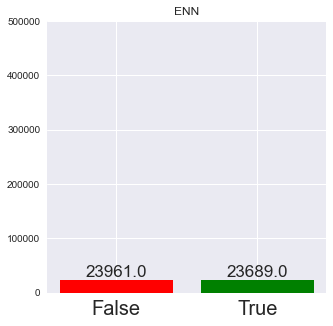

In [70]:
plt.style.use(['seaborn'])
x = ['False', 'True']
plt.figure(figsize=(5, 5))
plt.rc('xtick', labelsize=20)
values = [y_samp_5.value_counts()[0], y_samp_5.value_counts()[1]]
bar = plt.bar(x, values, color=['r','g'])
plt.ylim(0, 500000)
plt.title('ENN')
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 17)
plt.show()

Counter({False: 42135, True: 23689})


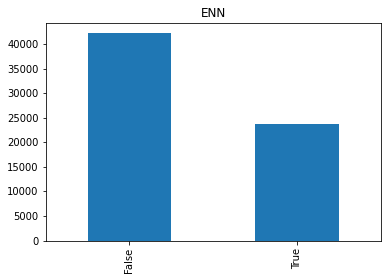

In [8]:
print(Counter(y_samp_30))
y_samp_30.value_counts().plot(kind='bar', title = 'ENN')
plt.show()

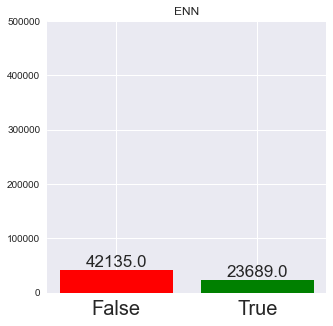

In [23]:
plt.style.use(['seaborn'])
x = ['False', 'True']
plt.figure(figsize=(5, 5))
plt.rc('xtick', labelsize=20)
values = [y_samp_30.value_counts()[0], y_samp_30.value_counts()[1]]
bar = plt.bar(x, values, color=['r','g'])
plt.ylim(0, 500000)
plt.title('ENN')
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 17)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

## Neighbourhood Cleaning Rule
### Neighbourhood Cleaning Rule 방법은 CNN(Condensed Nearest Neighbour) 방법과 ENN(Edited Nearest Neighbours) 방법을 섞은 것이다.

In [ ]:
X_samp, y_samp = NeighbourhoodCleaningRule(kind_sel="all", n_neighbors=5, random_state=0).fit_resample(X, y)

# 오버 샘플링

In [24]:
from imblearn.over_sampling import *

## RandomOverSampler
### Random Over Sampling은 소수 클래스의 데이터를 반복해서 넣는 것(replacement)이다. 가중치를 증가시키는 것과 비슷하다.

In [ ]:
X_samp, y_samp = RandomOverSampler(random_state=0).fit_resample(X, y)

## ADASYN
### ADASYN(Adaptive Synthetic Sampling) 방법은 소수 클래스 데이터와 그 데이터에서 가장 가까운 k개의 소수 클래스 데이터 중 무작위로 선택된 데이터 사이의 직선상에 가상의 소수 클래스 데이터를 만드는 방법이다.

In [ ]:
X_samp, y_samp = ADASYN(random_state=0).fit_resample(X, y)

## SMOTE
### SMOTE(Synthetic Minority Over-sampling Technique) 방법도 ADASYN 방법처럼 데이터를 생성하지만 생성된 데이터를 무조건 소수 클래스라고 하지 않고 분류 모형에 따라 분류한다.

In [25]:
X_samp_over, y_samp_over = SMOTE(k_neighbors=5).fit_resample(X_train, y_train)

Counter({True: 335488, False: 335488})


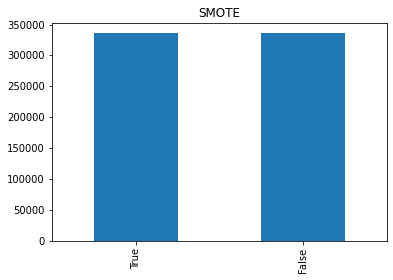

In [18]:
print(Counter(y_samp_over))
y_samp_over.value_counts().plot(kind='bar', title = 'SMOTE')
plt.show()

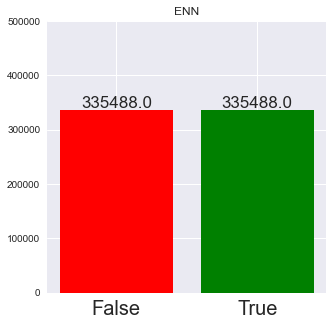

In [26]:
plt.style.use(['seaborn'])
x = ['False', 'True']
plt.figure(figsize=(5, 5))
plt.rc('xtick', labelsize=20)
values = [y_samp_over.value_counts()[0], y_samp_over.value_counts()[1]]
bar = plt.bar(x, values, color=['r','g'])
plt.ylim(0, 500000)
plt.title('ENN')
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 17)
plt.show()

## ENN + SMOTE 

In [30]:
X_samp_ES, y_samp_ES = SMOTE(k_neighbors=5).fit_resample(X_samp_30, y_samp_30)

In [49]:
# new_data.to_csv('train_D_U_O.csv')

In [45]:
test_data = pd.concat([X_test,y_test], axis=1)

In [50]:
# test_data.to_csv('test_D_U_O.csv')

Counter({False: 42135, True: 42135})


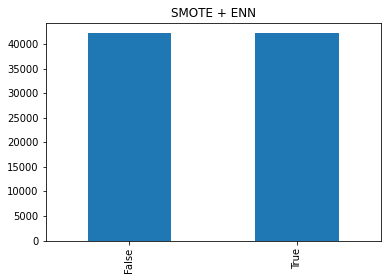

In [20]:
print(Counter(y_samp_ES))
y_samp_ES.value_counts().plot(kind='bar', title = 'SMOTE + ENN')
plt.show()

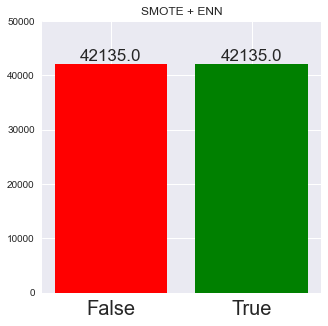

In [29]:
plt.style.use(['seaborn'])
x = ['False', 'True']
plt.figure(figsize=(5, 5))
plt.rc('xtick', labelsize=20)
values = [y_samp_ES.value_counts()[0], y_samp_ES.value_counts()[1]]
bar = plt.bar(x, values, color=['r','g'])
plt.ylim(0, 50000)
plt.title('SMOTE + ENN')
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 17)
plt.show()

# 복합 샘플링

In [ ]:
from imblearn.combine import *

## SMOTE+ENN

In [ ]:
X_samp, y_samp = SMOTEENN(smote=SMOTE(k_neighbors=20),enn=EditedNearestNeighbours(kind_sel="all", n_neighbors=10)).fit_resample(X, y)

## SMOTE+Tomek

In [ ]:
X_samp, y_samp = SMOTETomek(random_state=0).fit_resample(X, y)